In [1]:
pip install pyodbc

     ---------------------------------------- 0.0/68.7 kB ? eta -:--:--
     ---------------- --------------------- 30.7/68.7 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 68.7/68.7 kB 943.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pyodbc

# Replace 'your_server', 'your_database', 'your_username', and 'your_password' with your actual values
server = 'FAKETAXI'
database = 'IrisDB'
# username = 'your_username'
# password = 'your_password'

# Create a connection string
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database}' #;UID={username};PWD={password}'

# Establish a connection
conn = pyodbc.connect(conn_str)

# Replace 'IrisData' with your actual table name
table_name = 'IrisData'

# Read the data into a DataFrame
query = f'SELECT * FROM {table_name};'
df = pd.read_sql(query, conn)

# Display the DataFrame
print(df)

# Close the connection
conn.close()


     SepalLength  SepalWidth  PetalLength  PetalWidth    Variety
0            5.1         3.5          1.4         0.2     Setosa
1            4.9         3.0          1.4         0.2     Setosa
2            4.7         3.2          1.3         0.2     Setosa
3            4.6         3.1          1.5         0.2     Setosa
4            5.0         3.6          1.4         0.2     Setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  Virginica
146          6.3         2.5          5.0         1.9  Virginica
147          6.5         3.0          5.2         2.0  Virginica
148          6.2         3.4          5.4         2.3  Virginica
149          5.9         3.0          5.1         1.8  Virginica

[150 rows x 5 columns]


C:\Users\aryan\AppData\Local\Temp\ipykernel_12692\377472353.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())

Sample Data:
   SepalLength  SepalWidth  PetalLength  PetalWidth Variety
0          5.1         3.5          1.4         0.2  Setosa
1          4.9         3.0          1.4         0.2  Setosa
2          4.7         3.2          1.3         0.2  Setosa
3          4.6         3.1          1.5         0.2  Setosa
4          5.0         3.6          1.4         0.2  Setosa


In [5]:
# Basic statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.057333     3.758000    1.199333
std       0.828066    0.435866     1.765298    0.762238
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


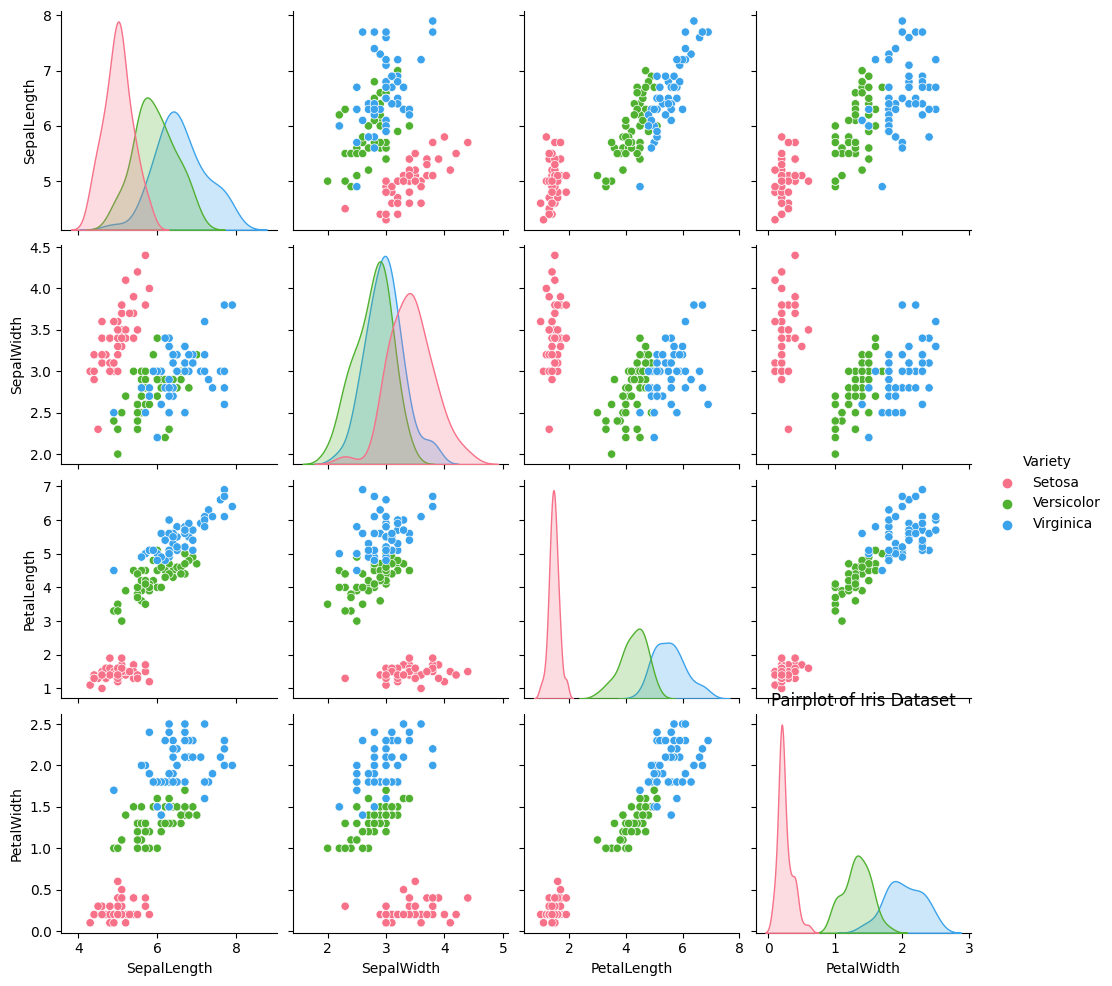

In [7]:
# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='Variety', markers='o', palette='husl')
plt.title('Pairplot of Iris Dataset')
plt.show()

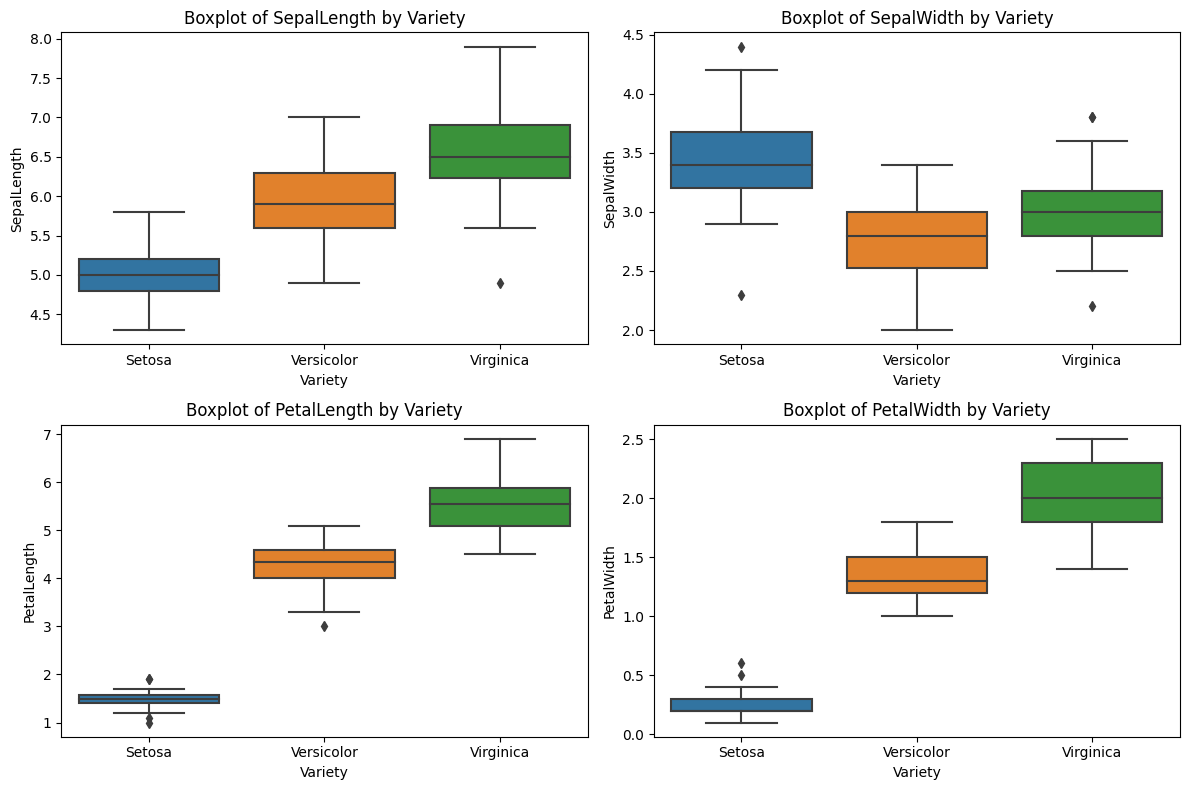

In [10]:
# Boxplot to visualize the distribution of each variable by variety
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Variety', y=col, data=df)
    plt.title(f'Boxplot of {col} by Variety')

plt.tight_layout()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_12692\1002345332.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


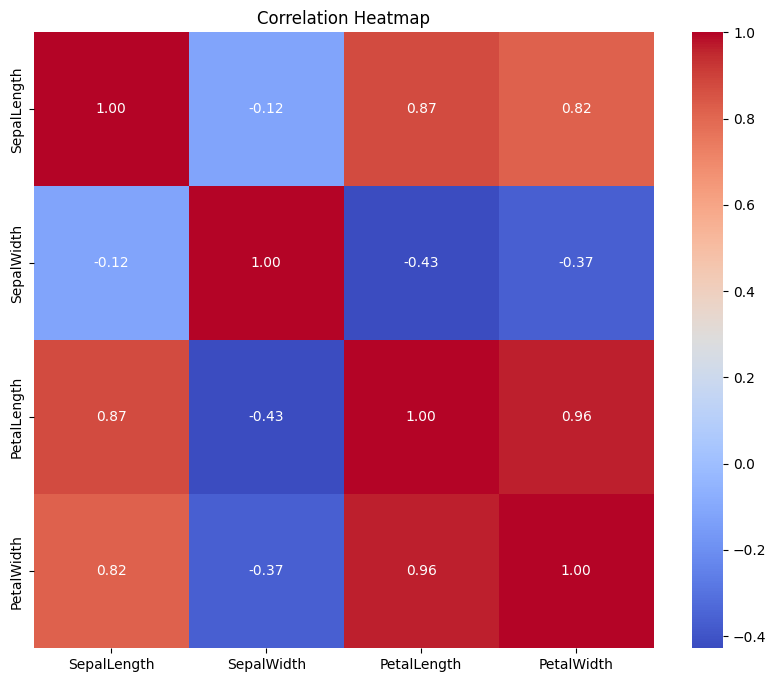

In [12]:
# Correlation heatmap to visualize relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Assuming 'X' contains the feature columns and 'y' contains the target variable 'variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [23]:
# Assuming 'X' contains the feature columns and 'y' contains the target variable 'variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [28]:

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



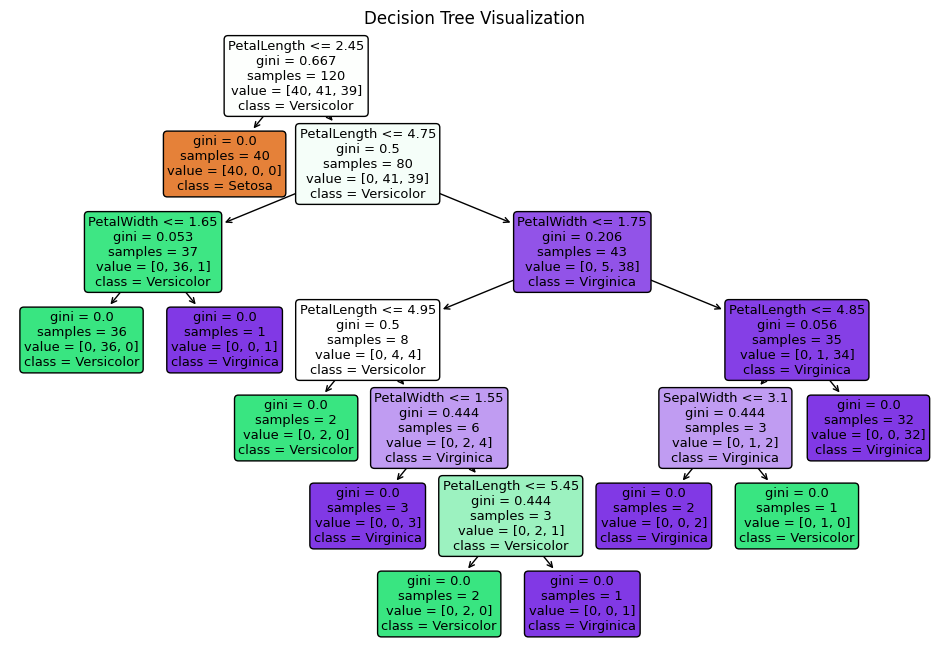

In [30]:
# Visualize the decision tree (optional)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=df['Variety'].unique(), filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [36]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
 from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
k_value = 3  # You can adjust the value of k
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


# We use GaussianNB from scikit-learn for classification. This assumes that the features follow a Gaussian (normal) distribution.
# The dataset is split into training and testing sets.
# The Naive Bayes model is initialized and trained using the training set.
# Predictions are made on the test set.
# Model performance is evaluated using accuracy and a classification report.
# Naive Bayes is known for its simplicity and efficiency, especially for text classification and other tasks with high-dimensional data. However, keep in mind that the assumption of feature independence might not hold in all cases.

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
model = MLPClassifier(random_state=42, max_iter=1000)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains the feature columns and 'y' contains the target variable 'Variety'
X = df.drop('Variety', axis=1)
y = df['Variety']

# Encode the categorical classes into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode the predictions back to original labels if needed
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     --------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
     --------------------------------------- 0.1/99.8 MB 744.7 kB/s eta 0:02:14
     ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:38
     ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:20
     ---------------------------------------- 0.3/99.8 MB 1.5 MB/s eta 0:01:07
     ---------------------------------------- 0.3/99.8 MB 1.5 MB/s eta 0:01:07
     ---------------------------------------- 0.4/99.8 MB 1.2 MB/s eta 0:01:23
     ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:28
     ---------------------------------------- 0.4/99.8 MB 1.1 MB/s eta 0:01:28
     ---------------------------------------- 0.5/99.8 MB 1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\aryan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
